In [1]:
import pandas as pd
country_name = 'Azerbaijan'

In [2]:
hotels_df = pd.read_csv('/content/hotels_UNdata_Export_20220115_134818731.csv')
hotels_df.head(10)


,Country or Area,SNA93 Table Code,Sub Group,Item,SNA93 Item Code,Year,Series,Currency,SNA System,Fiscal Year Type,Value,Value Footnotes
0,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2019.0,1100.0,Euro,2008.0,Western calendar year,72138146.0,1
1,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2018.0,1100.0,Euro,2008.0,Western calendar year,71260000.0,1
2,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2017.0,1100.0,Euro,2008.0,Western calendar year,76071000.0,1
3,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2017.0,1000.0,Euro,2008.0,Western calendar year,76071000.0,1
4,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2016.0,1100.0,Euro,2008.0,Western calendar year,82671000.0,1
5,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2016.0,1000.0,Euro,2008.0,Western calendar year,82671000.0,1
6,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2015.0,1100.0,Euro,2008.0,Western calendar year,73104000.0,1
7,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2015.0,1000.0,Euro,2008.0,Western calendar year,73104000.0,1
8,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2014.0,1100.0,Euro,2008.0,Western calendar year,78394000.0,1
9,Andorra,3.2,Individual consumption expenditure of households,Restaurants and hotels,11.0,2014.0,1000.0,Euro,2008.0,Western calendar year,78394000.0,1


In [3]:
hotels_df = hotels_df.rename(columns={'Country or Area':'country'})
hotels_df = hotels_df[['country','Year','Series','Value']].dropna()
hotels_df = hotels_df[hotels_df['country'] == country_name]
latest_series_version = hotels_df['Series'].max()
hotels_df = hotels_df[hotels_df['Series'] == latest_series_version]

Another dataset for "Individual consumption expenditure of households, NPISHs, and general government at current prices

http://data.un.org/Data.aspx?d=SNA&f=group_code%3a302%3bitem_code%3a23


We need to handle different country names from F1 dataset and UN dataset, we only have the below countries in map to handle, other countries work find

In [4]:
country_map = {
    'UK':	'United Kingdom',
    'China':	'China, People\'s Republic of',
    'USA'	:'United States',
    'UAE'	:'United Arab Emirates',
    'Korea'	:'Democratic People\'s Republic of Korea',
    'Russia'	:'Russian Federation',
    'Vietnam':'Viet Nam'
}



---


Load all circuits in the world, taken from 
https://www.kaggle.com/rohanrao/formula-1-world-championship-1950-2020/version/14

In [5]:
#Data Pipeline : Extract
circuits_df = pd.read_csv("/content/circuits.csv")
for key in country_map.keys():
  circuits_df.loc[circuits_df['country'] == key, 'country'] = country_map[key]



---


Get the racing years related to this country

In [6]:
circuitId = None
cid_df = circuits_df[circuits_df['country'] == country_name]['circuitId']
if len(cid_df) > 0:
  circuitId = cid_df.values[0]
print(country_name+" circuit id is " + str(circuitId))

Azerbaijan circuit id is 73


In [7]:
races_df = pd.read_csv('/content/races.csv')
races_df = races_df[races_df['circuitId'] == circuitId]
racing_years = races_df['year'].values
print("races hosted by this country: " + str(racing_years))

races hosted by this country: [2016 2017 2018 2019 2021 2022]


In [8]:
# Multiple Bar Graph
import matplotlib.pyplot as plt
import numpy as np


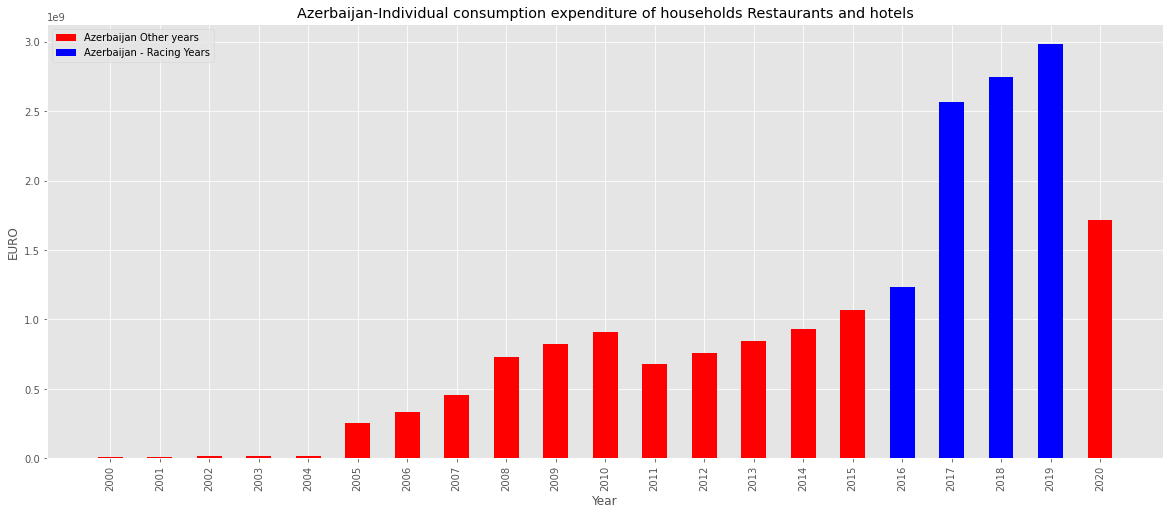

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(20,8))

width=0.5

in_racing_years = hotels_df[hotels_df['Year'].isin(racing_years)]
not_racing_years = hotels_df[~hotels_df['Year'].isin(racing_years)]

# Multiple Bar Graph
x_labels =hotels_df['Year']
# first location for first bar in x-axis


plt.bar(not_racing_years['Year'], not_racing_years['Value'], width, label=(country_name + " Other years"), color='red')
plt.bar(in_racing_years['Year'], in_racing_years['Value'], width, label=(country_name + " - Racing Years"), color='blue')


plt.title(country_name + "-Individual consumption expenditure of households Restaurants and hotels")
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("EURO")
plt.xticks(x_labels)
plt.legend()
plt.show()
